# 1 

A partir del fichero "US_Crime_Rates_1960_2014", se pide:

1. Tratar el dataset como una serie temporal a partir de la columna Year. Siempre el eje X será el nuevo índice Year.
2. Dibujar todas las columnas numéricas.
3. Como se puede ver en el punto 2, la columna "Population" tiene una magnitud diferente a la de las demás columnas: Dibuja la misma gráfica que antes pero con dos resoluciones diferentes para que se puedan observar con mejor detalle todas las columnas. 
4. A partir de ahora y para el resto del ejercicio, borra las columnas "Population" y "Total" ¿Qué columnas tienen mejor correlación? 
5. A partir de las cinco columnas que tengan mejor correlación con la columna "Murder", entrena un modelo de regresión no lineal a partir de polinomio de grado 6. Este modelo ha de entrenarse siguiendo el esquema recomendado de validación cruzada y almacenando los errores de entrenamiento y validación en cada iteración del entrenamiento.
6. Representa la evolución de los errores de validación y entrenamiento en una gráfica. ¿Ha habido sobreaprendizaje?. Utiliza n_iteraciones=23 y n_repeats=7.

<AxesSubplot:xlabel='Year'>

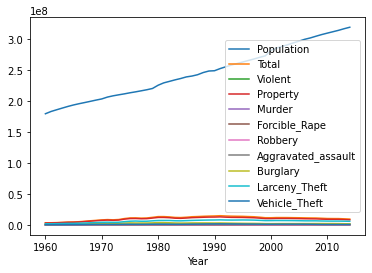

In [11]:
import pandas as pd

df = pd.read_csv("../data/US_Crime_Rates_1960_2014.csv")

df.set_index("Year", inplace=True)
df.plot()

In [12]:
df.head()

,Population,Total,Violent,Property,Murder,Forcible_Rape,Robbery,Aggravated_assault,Burglary,Larceny_Theft,Vehicle_Theft
Year,,,,,,,,,,,
1960,179323175,3384200,288460,3095700,9110,17190,107840,154320,912100,1855400,328200
1961,182992000,3488000,289390,3198600,8740,17220,106670,156760,949600,1913000,336000
1962,185771000,3752200,301510,3450700,8530,17550,110860,164570,994300,2089600,366800
1963,188483000,4109500,316970,3792500,8640,17650,116470,174210,1086400,2297800,408300
1964,191141000,4564600,364220,4200400,9360,21420,130390,203050,1213200,2514400,472800


In [13]:
 df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 55 entries, 1960 to 2014
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype
---  ------              --------------  -----
 0   Population          55 non-null     int64
 1   Total               55 non-null     int64
 2   Violent             55 non-null     int64
 3   Property            55 non-null     int64
 4   Murder              55 non-null     int64
 5   Forcible_Rape       55 non-null     int64
 6   Robbery             55 non-null     int64
 7   Aggravated_assault  55 non-null     int64
 8   Burglary            55 non-null     int64
 9   Larceny_Theft       55 non-null     int64
 10  Vehicle_Theft       55 non-null     int64
dtypes: int64(11)
memory usage: 5.2 KB


In [3]:
#3

In [14]:
#4

df = df.drop( ["Population", "Total"], 1)
df.corr()


,Violent,Property,Murder,Forcible_Rape,Robbery,Aggravated_assault,Burglary,Larceny_Theft,Vehicle_Theft
Violent,1.000000,0.943351,0.795300,0.973914,0.919249,0.981071,0.646607,0.974791,0.909182
Property,0.943351,1.000000,0.895641,0.912517,0.965363,0.875536,0.847149,0.980528,0.906130
Murder,0.795300,0.895641,1.000000,0.699655,0.960156,0.668511,0.920207,0.806279,0.856600
Forcible_Rape,0.973914,0.912517,0.699655,1.000000,0.847794,0.974379,0.588529,0.967417,0.826284
Robbery,0.919249,0.965363,0.960156,0.847794,1.000000,0.826500,0.864444,0.920460,0.916280
Aggravated_assault,0.981071,0.875536,0.668511,0.974379,0.826500,1.000000,0.498449,0.941906,0.858725
Burglary,0.646607,0.847149,0.920207,0.588529,0.864444,0.498449,1.000000,0.734091,0.690423
Larceny_Theft,0.974791,0.980528,0.806279,0.967417,0.920460,0.941906,0.734091,1.000000,0.885326
Vehicle_Theft,0.909182,0.906130,0.856600,0.826284,0.916280,0.858725,0.690423,0.885326,1.000000


In [25]:
df.corrwith(df['Murder'], axis=0)


Violent               0.795300
Property              0.895641
Murder                1.000000
Forcible_Rape         0.699655
Robbery               0.960156
Aggravated_assault    0.668511
Burglary              0.920207
Larceny_Theft         0.806279
Vehicle_Theft         0.856600
dtype: float64

In [ ]:
 Property Robbery Burglary Vehicle_Theft Larceny_Theft

In [36]:
import numpy as np 
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold, RepeatedKFold
from sklearn.ensemble import RandomForestClassifier
import matplotlib.pyplot as plt

In [34]:
#5

X= np.array(df.drop(['Murder', 'Violent', 'Forcible_Rape', 'Aggravated_assault'], 1))
y = np.array(df["Murder"])

# Split dataset into training set and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3,random_state=109)

polinominal_model = PolynomialFeatures(6) 
X_poly = polinominal_model.fit_transform(X_train ,y_train)

lin_reg_model = LinearRegression()
lin_reg_model.fit(X_poly, y_train)
y_pred = lin_reg_model.predict(X_poly)

k_fold = RepeatedKFold(n_splits=4, n_repeats=1, random_state=1)
val_score = []
train_score = []
path = os.getcwd() + os.sep
print("path:", path)
for i, (train, val) in enumerate(k_fold.split(X_train)):
    lin_reg_model.fit(X_train[train], y_train[train])
    score_val = lin_reg_model.score(X_train[val], y_train[val])
    val_score.append(score_val)
    score_train = lin_reg_model.score(X_train[train], y_train[train])
    train_score.append(score_train)

model = RandomForestClassifier(warm_start= True)
print("y_pred", y_pred.shape)
print("Score:", r2_score(y_train, y_pred))
print('RMSE:', mean_squared_error(y_train, y_pred, squared=False))

# meter cross validation al modelo

path: c:\Users\javig\OneDrive\Documents\Bootcamp\The_Bridge_Javier\BootCamp_JGAF\week9\day4\exercises\
y_pred (38,)
Score: 0.9999999998983167
RMSE: 0.043443201633242605


[0.9489083998248651,
 0.9605488120234414,
 0.9806807270754487,
 0.9834962967302137]

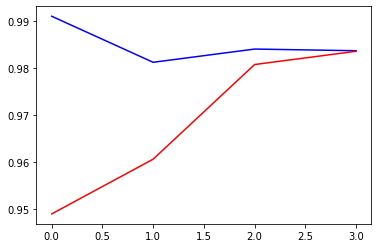

In [37]:
plt.plot(train_score, color="b")
plt.plot(val_score, color="r")
val_score

In [ ]:
# generar graficas de errores